In [26]:
using Plots
using SparseArrays
using LinearAlgebra
using BenchmarkTools
using DifferentialEquations

In [27]:
function set_initial_condition_1(x)
    A = 100.
    l = 80
    A * sin((pi / l ) * x)
end

set_initial_condition_1 (generic function with 1 method)

# A) Define function 

$$ 

\frac{\partial ^2 W}{\partial t^2} = \alpha \frac{\partial ^4 W}{\partial x^4} 
$$
$$
\Leftrightarrow

\frac{\partial ^2 W}{\partial t^2} = \alpha  \times f(du,u,p,t)
$$

With the function $ f(du,u,p,t) $ for i in [1,N+1] : 

$$
du[1] = \frac{u_2 - u_1}{dx}
$$

$$
du[2] = \frac{u_3 - 2u_2 + u_1}{dx^2}
$$

$$
du[3:length(u)-2] = \frac{u_{i+2} - 4u_{i+1} + 6u_{i} -4u_{i-1} + u_{i-2}}{dx^4}
$$

$$
du[N] = \frac{u_{N+1}- 2u_N + u_{N-1}}{dx^2}
$$

$$
du[N+1] = \frac{u_{N+1} - u_N}{dx}
$$

Morover, the CFL condition is $ \frac{dx^2}{2C} > dt $


In [28]:
function biharmonic_equation!(du,u,p,t)
    alpha,dx = p

    du[1] = alpha * (-u[1] + u[2]) / dx
    du[2] = alpha * (u[1] - 2*u[2] + u[3])/dx^2

    for i in 3:(length(u)-1)-2
        du[i] = alpha * (u[i-2] - 4*u[i-1] + 6*u[i] -4*u[i+1] + u[i+2])/dx^4
    end 

    du[end-1] = alpha * (u[end-2] - 2*u[end-1] + u[end])/dx^2
    du[end] = alpha * (-u[end-1] + u[end]) / dx
  
end 

biharmonic_equation! (generic function with 1 method)

In [33]:

L = 80.0
dx = 0.5
x = 0.0:dx:L


init = set_initial_condition_1.(x)
alpha = 10^5
P = [alpha, dx]

t_begin  = 0.0
t_end = 10000.0
tspan = (t_begin, t_end)

prob = ODEProblem(biharmonic_equation!, init, tspan, P)
sol = DifferentialEquations.solve(prob, Tsit5(), abstol=1e-8, reltol=1e-8)


┌ Warning: Instability detected. Aborting
└ @ SciMLBase /home/yann/.julia/packages/SciMLBase/iwGOQ/src/integrator_interface.jl:606


retcode: Unstable
Interpolation: specialized 4th order "free" interpolation
t: 1603-element Vector{Float64}:
 0.0
 6.677584346694519e-8
 9.5721923662307e-8
 1.3299026135087617e-7
 1.6340103155827868e-7
 1.9271458474466233e-7
 2.1875850627876663e-7
 2.4253268799560676e-7
 2.639388830575233e-7
 2.833505201321957e-7
 ⋮
 4.96182420954084e-6
 4.9649933505111485e-6
 4.968162657382386e-6
 4.971332130163237e-6
 4.974501769492171e-6
 4.977671574958062e-6
 4.9808415474094175e-6
 4.9840116866450735e-6
 4.987181993093749e-6
u: 1603-element Vector{Vector{Float64}}:
 [0.0, 1.96336924606283, 3.925981575906861, 5.887080365118903, 7.845909572784494, 9.80171403295606, 11.753739745783765, 13.701234168196802, 15.643446504023087, 17.57962799343545  …  17.579627993435473, 15.643446504023098, 13.701234168196805, 11.753739745783754, 9.801714032956083, 7.845909572784507, 5.887080365118905, 3.925981575906895, 1.9633692460628533, 1.2246467991473532e-14]
 [0.026048252896746865, 1.9637064086527796, 3.9277074585389

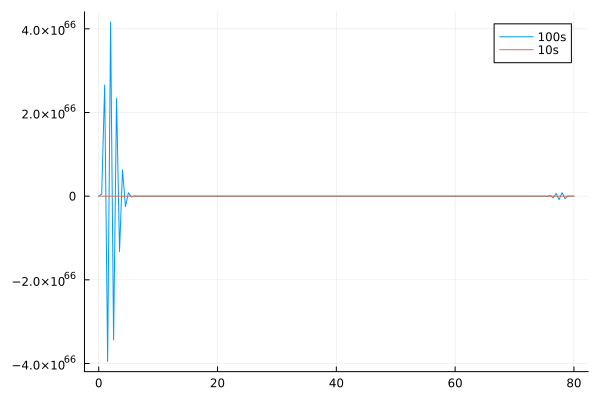

In [30]:
u_t = sol(t_end)
#=plot(x,sol2(1000), label = "1000s")
plot!(x,sol2(800), label = "800s")
plot!(x,sol2(700), label = "700s")
plot!(x,sol2(600), label = "600s")
plot!(x,sol2(400), label = "400s")
plot!(x,sol2(300), label="300s")
plot!(x,sol2(200), label = "200s")=#
plot(x,sol(100), label = "100s")
plot!(x,sol(10), label = "10s")
#plot(x,sol2(t_begin), label = "0s")